<a href="https://colab.research.google.com/github/ksyed99/KNN-Classifier/blob/main/linearregression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
## Machine Learning Online Class - Exercise 1: Linear Regression

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     warmUpExercise
#     plotData
#     PART#01
#         gradientDescent
#         computeCost
#         Visualization
#         LearningRate
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s
	

#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex1data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [174]:
##==================== Part 1: Basic Function ====================
#Complete warmUpExercise 

# 5x5 matrix with 1's on main diagnol  

import numpy as np # numpy library is used for working with arrays
import numpy as geek # module used to create the square matrix with 1's on main diagonal
def iden(a):                                    # function definition
 # ==========YOUR CODE HERE============
 b = geek.identity(a, dtype = float) # a x a matrix with 1's on main diagonal stored in b
 # =================================== 
 return b  
print("Matrix a :\n", iden(5)) # function call


Matrix a :
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


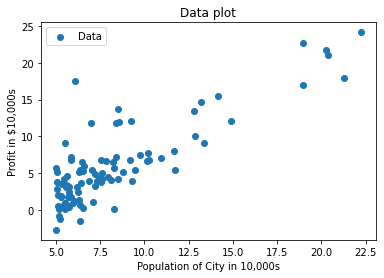

In [175]:
## ======================= Part 2: Plotting =======================

import matplotlib.pyplot as plt #library used for plotting
# used for manipulating directory paths
import os


# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]

 
# Plot Data
# Note: You have to complete the code in plotData function

def plotdata(a,b):                       # function def
  # plotting points as a scatter plot 
 # ==========YOUR CODE HERE============
 plt.scatter(a, b) # to obtain a scatter plot
 plt.xlabel('Population of City in 10,000s') # label the x axis
 plt.ylabel('Profit in $10,000s') # label the y axis
 plt.title('Data plot') # add the title
 plt.legend(['Data']); # add the legend
 # =================================== 
plotdata(X,Y)  # function Call
plt.show() # display the plot


In [176]:

m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first column is all ones to get where theta is (2x1) "theta[0]+theta[1]*X"
print(X.shape)


(97, 2)


In [177]:

import numpy as np 
from numpy import * # This provides an easy way to import all the items from a module into the current namespace

def computeCost(X,y,theta): # function definition
  m = y.size # training examples (value of m) equal to number of elements in y
  J = 0 # Cost variable intialized to zero 
  h = np.dot(X, theta) # matrix multiplication according to formula : h=1*theta[0] +X*theta[1]
  # ==========YOUR COST FUNCTION J HERE============
  total=0 # variable initialized to zero
  for i in range(m): # loop to incorporate all the training examples (97 in this case)
    squared_error=(h[i]-y[i])**2 # variable to store the squared error for the current iteration
    total=total +squared_error # variable to store the total squared error until that point  
    J= (1/(2*m))*total # total squared error divided by 2m to obtain the cost value 
 # ===================================
  return J

J = computeCost(X, Y, theta=np.array([0.0, 0.0])) # function call
print('With theta = [0, 0] \nCost computed =', J) # print the cost value
print('Expected cost value (approximately) 32.07\n') 


With theta = [0, 0] 
Cost computed = 32.072733877455654
Expected cost value (approximately) 32.07



(2,)
[6.737190464870008, 5.931593568604957, 5.901154707081387, 5.89522858644422, 5.890094943117333, 5.885004158443646, 5.879932480491416, 5.874879094762575, 5.8698439118063845, 5.86482686531293, 5.859827889932179, 5.85484692057229, 5.849883892376585, 5.844938740722035, 5.840011401218365, 5.835101809707228, 5.830209902261389, 5.825335615183866, 5.820478885007099, 5.8156396484921515, 5.810817842627869, 5.806013404630042, 5.801226271940627, 5.796456382226898, 5.791703673380653, 5.786968083517397, 5.782249550975539, 5.777548014315597, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434048, 5.754293134309077, 5.7496922950486296, 5.745108027745686, 5.740540272709014, 5.735988970462384, 5.7314540617437935, 5.7269354875047025, 5.722433188909259, 5.717947107333528, 5.713477184364748, 5.709023361800547, 5.704585581648198, 5.700163786123851, 5.695757917651815, 5.69136791886375, 5.686993732597982, 5.682635301898705, 5.678292570015293, 5.673965480401505, 5.6696539767147955, 5.66

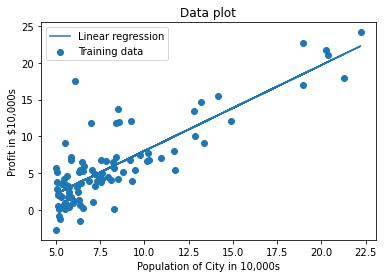

In [178]:

def gradientDescent(X, y, theta, alpha, num_iters): # function definition
  m = y.shape[0] # training examples (value of m) equal to number of elements in y
  theta = theta.copy() # copy of theta to avoid changing the original array 
  J_history = [] # list to store every cost value obtained in each iteration
  total=0 # initializing variable to zero 
  for i in range(num_iters): # loop to run as many times as we specify
    # ==========YOUR GRADIENT DESCENT "theta" HERE============     
      h = np.dot(X, theta) # same as in above function
      theta=theta-alpha*(1/m)*X.T.dot(h-y) # following the gradient descent formula  
      J_history.append(computeCost(X, y, theta)) # from each iteration, cost value added to the list
    # ===================================   
  return theta, J_history
  



#=============== initialize fitting parameters
theta = np.zeros(2) # initializing theta[0] and theta[1] to zero
print(theta.shape) # display the shape of theta
# =================some gradient descent settings
iterations = 1500 # value which will determine how many times gradient descent is performed
alpha = 0.01 # chosen value for the learning rate

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations) #function call
print(J_history) # display the list of cost values


# plot the linear fit
plotdata(X[:, 1],Y) # plot the graph of Y versus X
plt.plot(X[:, 1], np.dot(X, theta)) # plot the graph of h versus X 
plt.legend([ 'Linear regression','Training data',]); # add legend


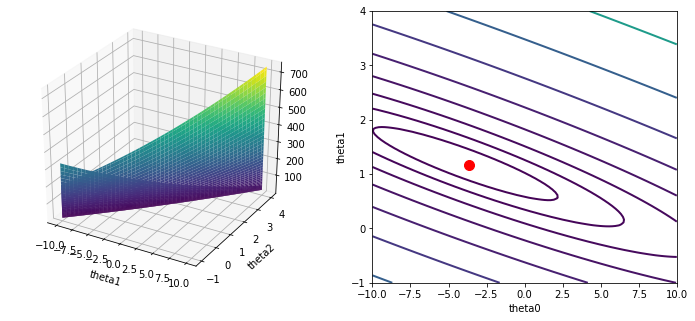

In [179]:
# ==================================NO NEED CHANGE CODE IN THIS CELL
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# grid over which we will calculate J COST
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((t0.shape[0], t1.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(t0):
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass



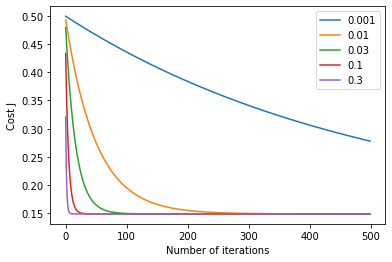

In [180]:

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',') # data loaded
X, Y = data[:, 0], data[:, 1] # first column of data belongs to X and second to Y 
X_norm = X;
mu =0.0; # initialized to zero 
sigma=0.0; # initialized to zero

def  featureNormalize(X):      # function definition
# Function to transform features in a way that they will have properties of a std normal distribution
# In order to get the required point in gradient descent merged quickly, we perform scaling 
  #===================YOUR CODE HERE=========
  mu=sum(X)/len(X) # stores the mean value 
  sigma=std(X) # stores the standard deviation
  for i in range(len(X)): # loop to incorporate all the elements in X 
    X_norm=(X-mu)/sigma # standardization performed according to the formula
  #==========================================   
  return X_norm, mu, sigma 

X, mu, sigma = featureNormalize(X) # function call for normalizing X
Y, mu, sigma = featureNormalize(Y) # function call for normalizing y

X = np.stack([np.ones(m), X], axis=1) #appending two vectors

# CHANGE THE VALUES of ALPHAS, 5 VALUES OF ALPHA 
#PLOT LEARNING RATES FOR FOLLOWING FOR ALPHAS, NO NEED TO CHANGE THE CODE ONLY REQUIRE "gradientDescent" TO BE DEFINED CORRECTLY


# some gradient descent settings
iterations = 500
alpha = [0.001,0.01,0.03,0.1,0.3] #--------------ENTER YOUR LEARNING RATES
costs=[]

for i in range(5):
  theta = np.zeros(2) 
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
          # initialize fitting parameters
  costs.append(J_history)
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()